<a href="https://colab.research.google.com/github/Jivang0/machine_learning_all/blob/main/AdaBoost4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = pd.DataFrame()

In [ ]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [ ]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

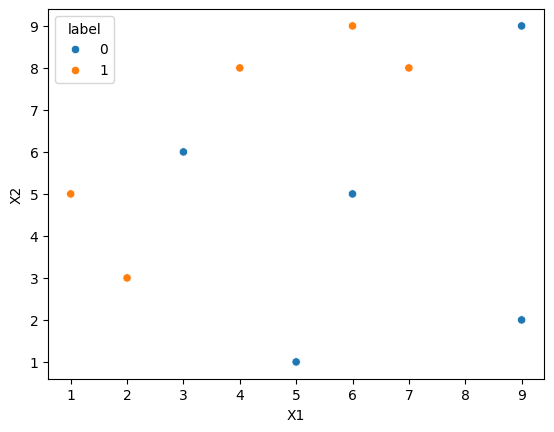

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])


In [ ]:
df['weights'] = 1/df.shape[0]

In [ ]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=1)
# Decision Stumps max_Depth = 1

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values


In [ ]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

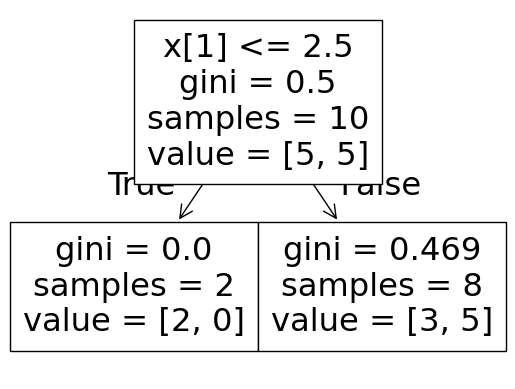

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

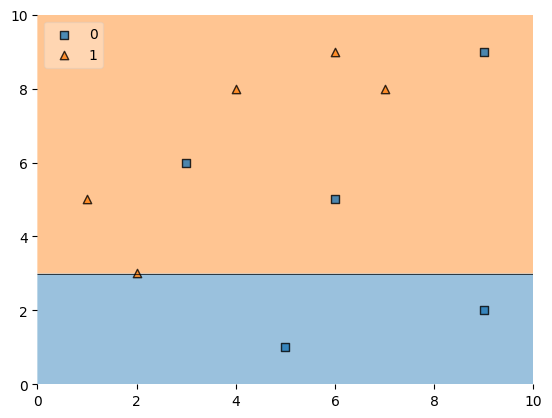

In [ ]:
plot_decision_regions(X,y,clf=dt1,legend=2)
# here 3 three mistakes( three orange are present in blue area)

In [ ]:
df['y_pred'] = dt1.predict(X)

In [ ]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [ ]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))
  # when working time your model predict all correct , error divied so whole term zero so
  #formula is 0.5 *np.log((1-error)/(error + 00000.1))

In [ ]:
# step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [ ]:
# step 4 - update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
    # alpha ko value negative cha weights ni decreases huncha
  else:
      return row['weights'] * np.exp(alpha)

In [ ]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [ ]:
df
# row 0,1,2,4,6,8,9 ma weight decreases weight from 0.1 to 0.065508
# row 3,5,7 ma weight increases form 0.1 to 0.15

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [ ]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [ ]:
# updates_weights total 1 hunch so normailzatioin garay ko
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [ ]:
df['normalized_weights'].sum()

np.float64(1.0)

In [ ]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [ ]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [ ]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [ ]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [ ]:
index_values = create_new_dataset(df)

index_values

[4, 1, 1, 6, 7, 4, 2, 4, 6, 2]

In [ ]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [ ]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1


In [ ]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [ ]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [ ]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.625, 0.5, '  False')]

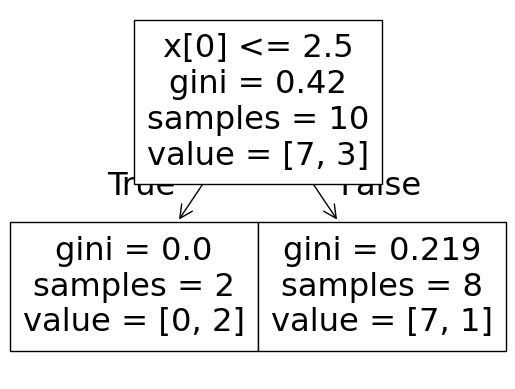

In [ ]:
plot_tree(dt2)

<Axes: >

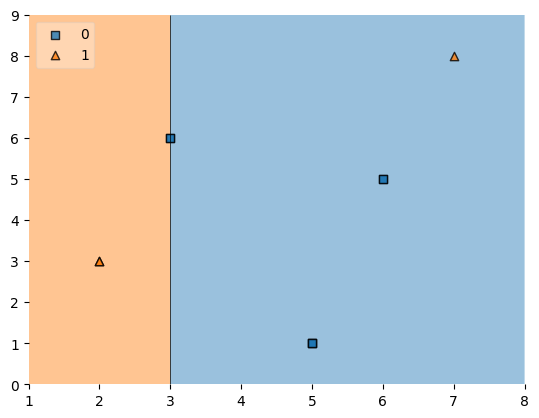

In [ ]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [ ]:
second_df['y_pred'] = dt2.predict(X)

In [ ]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
1,2,3,1,0.1,1
1,2,3,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0


In [ ]:
alpha2 = calculate_model_weight(0.1)

In [ ]:
alpha2

np.float64(1.0986122886681098)

In [ ]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [ ]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [ ]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
7,7,8,1,0.1,0,0.297427
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622


In [ ]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [ ]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,0,0.297427,0.495694
4,5,1,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034


In [ ]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [ ]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [ ]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [ ]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.056034,0.000000,0.056034
1,2,3,1,0.1,1,0.056034,0.056034,0.112068
1,2,3,1,0.1,1,0.056034,0.112068,0.168102
6,6,5,0,0.1,0,0.056034,0.168102,0.224136
7,7,8,1,0.1,0,0.495694,0.224136,0.719830
4,5,1,0,0.1,0,0.056034,0.719830,0.775864
2,3,6,0,0.1,0,0.056034,0.775864,0.831898
4,5,1,0,0.1,0,0.056034,0.831898,0.887932
6,6,5,0,0.1,0,0.056034,0.887932,0.943966
2,3,6,0,0.1,0,0.056034,0.943966,1.000000


In [ ]:
index_values = create_new_dataset(second_df)

In [ ]:

third_df = second_df.iloc[index_values,[0,1,2,3]]

In [ ]:
third_df

,X1,X2,label,weights
1,2,3,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1


In [ ]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)


DecisionTreeClassifier(max_depth=1)

<Axes: >

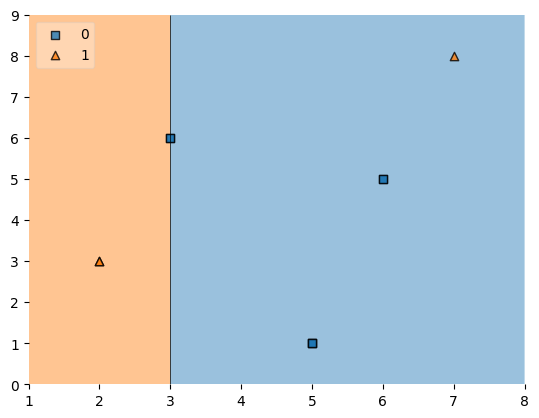

In [ ]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [ ]:

third_df['y_pred'] = dt3.predict(X)

In [ ]:
third_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,0
1,2,3,1,0.1,1
7,7,8,1,0.1,1
4,5,1,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
1,2,3,1,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0


In [ ]:
alpha3 = calculate_model_weight(0.2)
alpha3

np.float64(0.6931471805599453)

In [ ]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 0.6931471805599453


In [ ]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [ ]:
dt2.predict(query)

array([1])

In [ ]:
dt3.predict(query)

array([1])

In [ ]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(2.215408399421657)

In [ ]:
np.sign(2.21)

np.float64(1.0)

In [ ]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [ ]:
query = np.array([9,9]).reshape(1,2)
dt2.predict(query)

array([0])

In [ ]:
query = np.array([9,9]).reshape(1,2)
dt3.predict(query)

array([0])

In [ ]:
alpha1*1 + alpha2*(-1) + alpha3*(-1)

np.float64(-1.3681105390344532)

In [ ]:
np.sign(-1.36)

np.float64(-1.0)